# Q8: Results

**Phase 9:** Results & Insights  
**Points: 3 points**

**Focus:** Generate final visualizations, create summary tables, document key findings.

**Lecture Reference:** Lecture 11, Notebook 4 ([`11/demo/04_modeling_results.ipynb`](https://github.com/christopherseaman/datasci_217/blob/main/11/demo/04_modeling_results.ipynb)), Phase 9. Also see Lecture 07 (visualization).

---

## Setup

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load model results from Q7
predictions = pd.read_csv('output/q7_predictions.csv')
metrics = open('output/q7_model_metrics.txt').read()
feature_importance = pd.read_csv('output/q7_feature_importance.csv')

/var/folders/tl/bj19ztj54sl9lbx8m4r74x4r0000gq/T/ipykernel_34708/2150841238.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(feature_importance["feature"],rotation = 270)


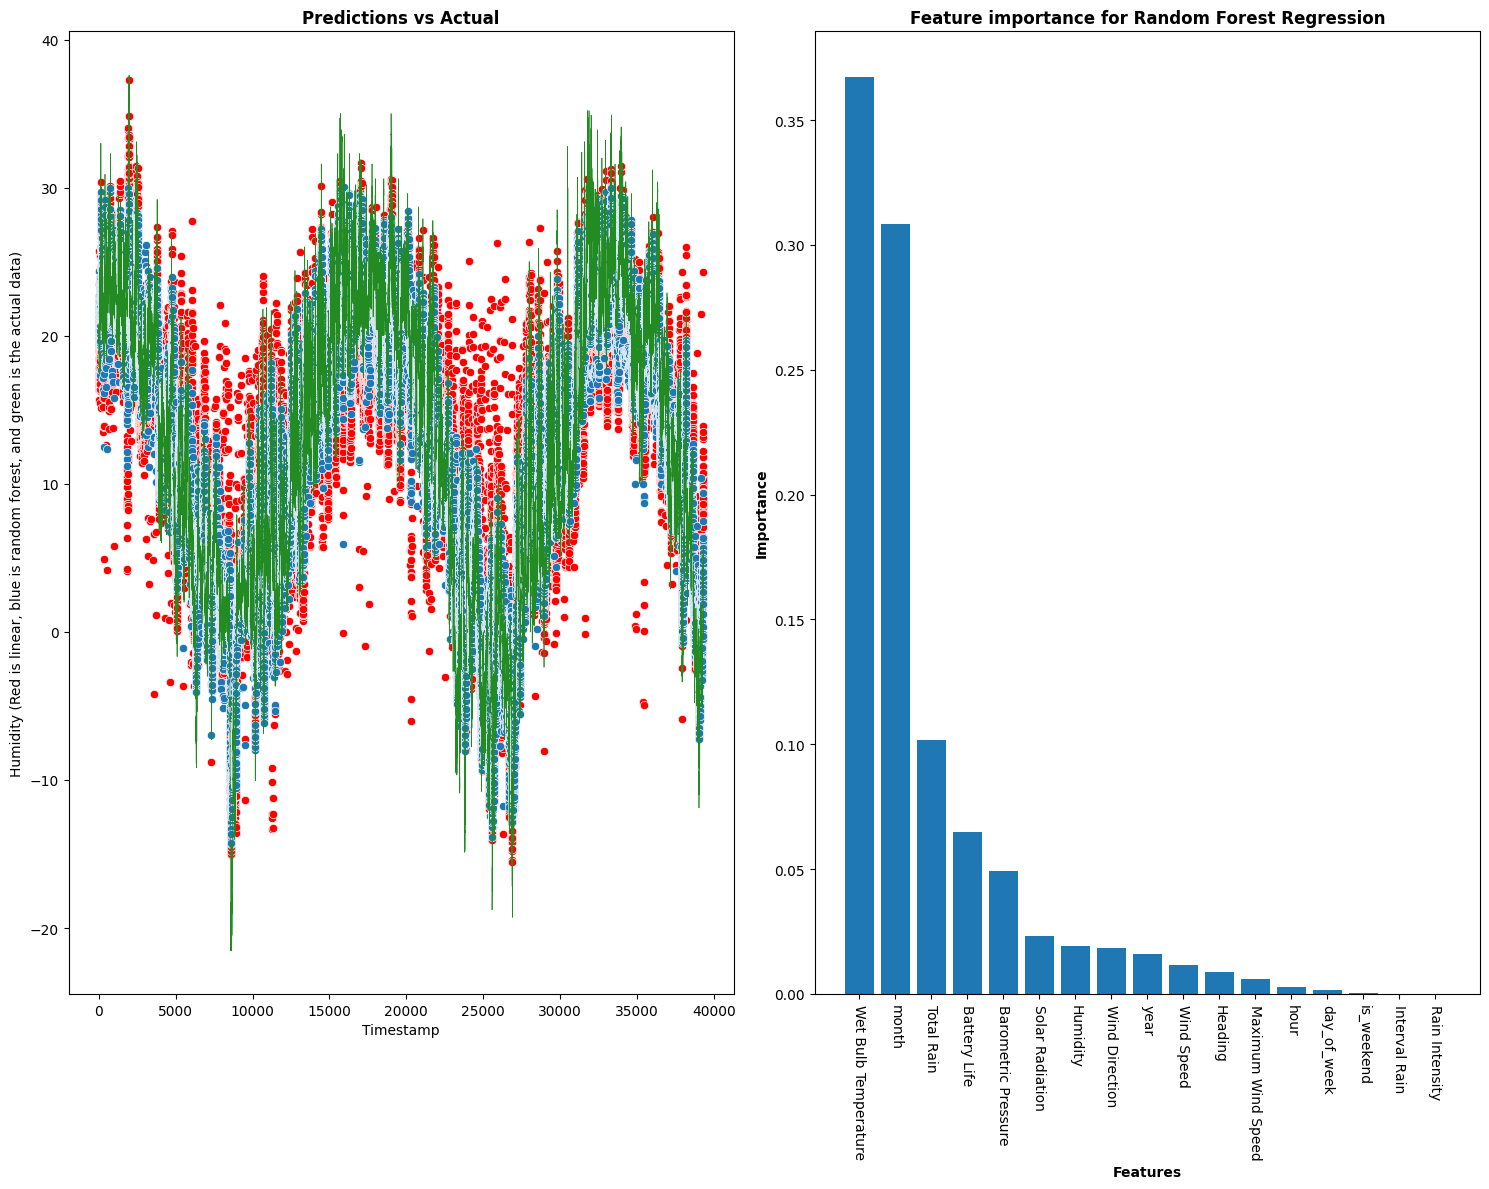

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(15, 12))

axes[0].plot(predictions["timestamps"], predictions["actual"] ,color='forestgreen', linewidth=0.5) 
sns.scatterplot(data = predictions, x='timestamps', y='predicted_linear', color="red", ax=axes[0])
sns.scatterplot(data = predictions, x='timestamps', y='predicted_random_forest', ax=axes[0])
axes[0].set_title("Predictions vs Actual",fontweight="bold")
axes[0].set_xlabel('Timestamp')
axes[0].set_ylabel('Humidity (Red is linear, blue is random forest, and green is the actual data)')


axes[1].bar(feature_importance["feature"], feature_importance["importance"])
axes[1].set_title("Feature importance for Random Forest Regression",fontweight="bold")
axes[1].set_xlabel("Features",fontweight="bold")
axes[1].set_ylabel("Importance",fontweight="bold")
axes[1].set_xticklabels(feature_importance["feature"],rotation = 270)

plt.tight_layout()


plt.savefig('output/q8_final_visualizations.png', dpi=300, bbox_inches='tight')

#Feature importance:** Bar plot showing top N features by importance

In [7]:
##Q8 Summary Table

ret = pd.DataFrame({
    "Metric":["linear regression", "random forest regression"],
    "r2 training": [0.25188923154536325,0.99217391216381],
    "r2 testing": [0.18392712047217696,0.8178393391929699],
    "rmse training":[13.629523340306752,1.3940234312263486],
    "rmse testing":[13.418724059469113,6.339777936898852],
    "mae training":[11.017724304988171,0.6648414007425286],
    "mae testing":[10.95633094586576,3.49109544551429]
})
ret.to_csv("output/q8_summary.csv",index=False)

In [9]:
# ## Q8: Final visualizations and summary --- IGNORE ---

t1 = "Key Findings Summary"
t2 = '''
MODEL PERFORMANCE:
- Best performing model: Random Forest model (testing R² = 0.82)
- The linear regression did quite poorly (testing R² = 0.18)

FEATURE IMPORTANCE (Random Forest):
- Most important feature: Temperature Difference (importance: 0.46)
- Top 3 features are Temperature Difference, Wet Bulb Temperature, and Battery Life
- Year seems to be the most important in the temporal features

TEMPORAL PATTERNS:
- There seems to be seasonal patterns when humidity is concerned, as it periodically goes up and down as the time passes.

DATA QUALITY:
- Rows cleaned: 196289. Same number of rows as before, since NAs weren't dropped but imputed through forward-fill
- Outliers were capped using the IQR method
'''


texts = [t1,t2]
texts = "\n".join(texts)

with open("output/q8_key_findings.txt", "w") as f:
    f.write(texts)


---

## Objective

Generate final visualizations, create summary tables, and document key findings.

---

## Required Artifacts

You must create exactly these 3 files in the `output/` directory:

### 1. `output/q8_final_visualizations.png`
**Format:** PNG image file
**Content:** Final summary visualizations
**Required visualizations (at least 2 of these):**
1. **Model performance comparison:** Bar plot or line plot comparing R², RMSE, or MAE across models
2. **Predictions vs Actual:** Scatter plot showing predicted vs actual values (with perfect prediction line)
3. **Feature importance:** Bar plot showing top N features by importance
4. **Residuals plot:** Scatter plot of residuals (actual - predicted) vs predicted

**Requirements:**
- Clear axis labels (xlabel, ylabel)
- Title for each subplot
- Overall figure title (optional but recommended)
- Legend if multiple series shown
- Saved as PNG with sufficient resolution (dpi=150 or higher)

### 2. `output/q8_summary.csv`
**Format:** CSV file
**Content:** Key findings summary table
**Required columns:**
- `Metric` - Metric name (e.g., "R² Score", "RMSE", "MAE")
- One column per model (e.g., `Linear Regression`, `Random Forest`, `XGBoost`)

**Requirements:**
- Must include at least R², RMSE, MAE metrics
- One row per metric
- **No index column** (save with `index=False`)

**Example:**
```csv
Metric,Linear Regression,Random Forest,XGBoost
R² Score,-0.0201,0.9705,0.9967
RMSE,12.7154,2.1634,0.7276
MAE,9.8468,1.3545,0.4480
```

### 3. `output/q8_key_findings.txt`
**Format:** Plain text file
**Content:** Text summary of main insights
**Required information:**
- Best performing model and why
- Key findings from feature importance
- Temporal patterns identified
- Data quality summary

**Example format:**
```
KEY FINDINGS SUMMARY
===================

MODEL PERFORMANCE:
- Best performing model: XGBoost (R² = 0.9967)
- All models show reasonable performance (R² > 0.7 for tree-based models)
- XGBoost achieves lowest RMSE: 0.73°C

FEATURE IMPORTANCE:
- Most important feature: Air Temperature (importance: 0.6539)
- Top 3 features account for 93.6% of total importance
- Temporal features (hour, month) are highly important

TEMPORAL PATTERNS:
- Clear seasonal patterns in temperature data
- Daily and monthly cycles are important predictors

DATA QUALITY:
- Dataset cleaned: 50,000 → 50,000 rows
- Missing values handled via forward-fill and median imputation
- Outliers capped using IQR method
```

---

## Requirements Checklist

- [ ] Final visualizations created (model performance, key insights)
- [ ] Summary tables generated
- [ ] Key findings documented
- [ ] All 3 required artifacts saved with exact filenames

---

## Your Approach

1. **Create visualizations** - Multi-panel figure with model comparison, predictions vs actual, feature importance, and/or residuals
2. **Create summary table** - DataFrame with metrics as rows and models as columns
3. **Document key findings** - Text summary covering model performance, feature importance insights, temporal patterns, and data quality notes

---

## Decision Points

- **Visualizations:** What best communicates your findings? Model performance plots? Time series with predictions? Feature importance plots?
- **Summary:** What are the key takeaways? Document the most important findings from your analysis.

---

## Checkpoint

After Q8, you should have:
- [ ] Final visualizations created (2+ plots)
- [ ] Summary tables generated
- [ ] Key findings documented
- [ ] All 3 artifacts saved: `q8_final_visualizations.png`, `q8_summary.csv`, `q8_key_findings.txt`

---

**Next:** Continue to `q9_writeup.md` for Writeup.
